<a href="https://colab.research.google.com/github/LeoGaunt/csc2034_DataScience_WineQuality/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Machine Learning Model to predict the quality of wine


Clone the repository and change the directory

In [1]:
!git clone https://github.com/LeoGaunt/csc2034_DataScience_WineQuality.git

Cloning into 'csc2034_DataScience_WineQuality'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 3), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 467.58 KiB | 2.38 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import os
os.chdir("csc2034_DataScience_WineQuality/data")

## Exploring the 2 Datasets

Now we have imported the datasets into collab, we can now explore the datasets and visualise them to help our understanding.

I will first look at how many wines are of each quality

I start this process by loading all the data in from the csv using the `pandas` module

In [3]:
import pandas as pd

# Load the Data
red_wine = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine = pd.read_csv("winequality-white.csv", delimiter=";")

Now that we have loaded the data we can have a look at how many wines in both red and white are of which quality

In [4]:
# Check unique quality values
print(red_wine["quality"].value_counts().sort_index())
print(white_wine["quality"].value_counts().sort_index())

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


We can now see the values of the qualities of each wine, however it would be much better if we could see this on a graph to visualise the data. I am going to use `matplotlib` to create a histogram and box plot for this data

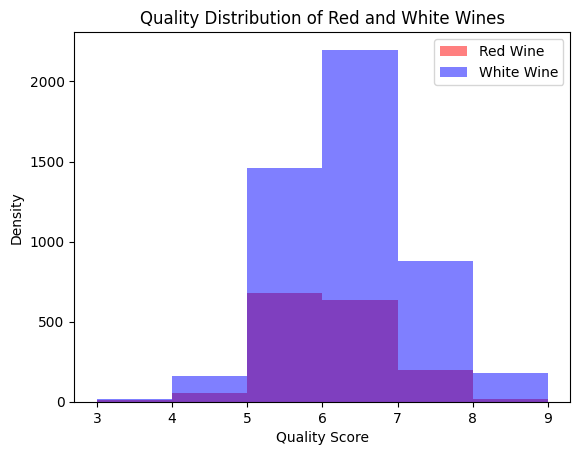

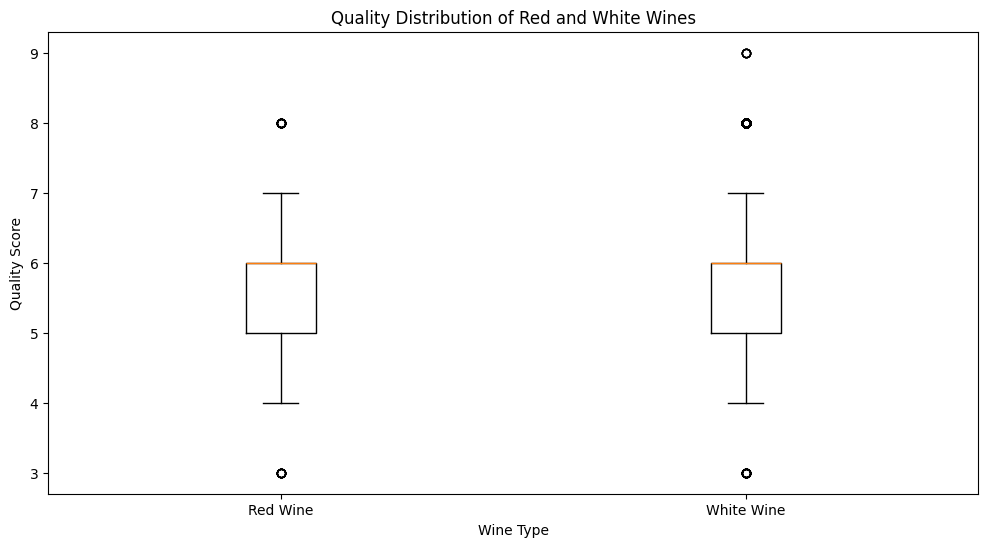

In [5]:
import matplotlib.pyplot as plt

# Plot the distributions

plt.hist(red_wine["quality"], alpha=0.5, label="Red Wine", color="red", bins=range(3, 10))
plt.hist(white_wine["quality"], alpha=0.5, label="White Wine", color="blue", bins=range(3, 10))
plt.legend(loc="upper right")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Quality Distribution of Red and White Wines")
plt.show()

plt.figure(figsize=(12,6))
plt.boxplot([red_wine["quality"], white_wine["quality"]], tick_labels=["Red Wine", "White Wine"])
plt.xlabel("Wine Type")
plt.ylabel("Quality Score")
plt.title("Quality Distribution of Red and White Wines")
plt.show()

Although these graphs were technically correct, I found that the historgram was harder to interpret due to the fact that there are over 200% more datapoints for red wine than white wine. Therefore I found I must normalise the data before interpreting from it to make it easier to interpret.

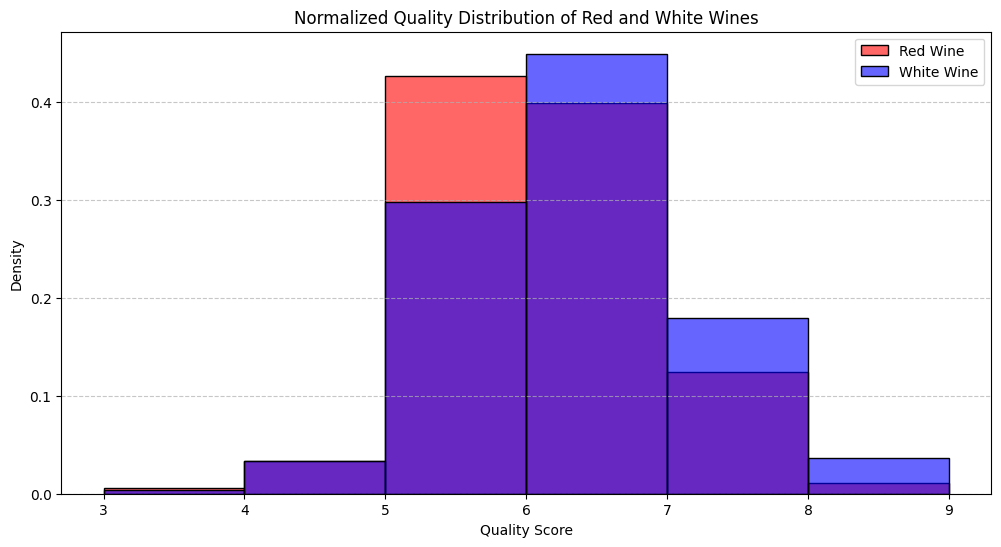

In [6]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(red_wine["quality"], bins=range(3, 10), kde=False, color="red", label="Red Wine", alpha=0.6, stat="density")
sns.histplot(white_wine["quality"], bins=range(3, 10), kde=False, color="blue", label="White Wine", alpha=0.6, stat="density")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Normalized Quality Distribution of Red and White Wines")
plt.legend()
plt.xticks(range(3, 10))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Overall we can see that most wines fall between the quality of 5 and 7. Now that the graph is normalised, it is much easier to see that white wines have a higher density of higher quality ratings compared to the red wine.

### Comparing quality against alcohol content

We can do this by discretising the alcohol content variables into low, med and high based on its distribution. This will be decided by

* `low < (avg - stddev)`
* `(avg - stddev) < med < (avg + stddev)`
* `(avg + stddev) < high`

I do this by creating a 3-valued `alcohol_cat` variable. I will use `pd.cut()` to split the `DataFrames`, by using pre-calculated bins that act as the defining area to split.

In [7]:
red_bins = [0,
        (red_wine["alcohol"].mean() - red_wine["alcohol"].std()),
        (red_wine["alcohol"].mean() + red_wine["alcohol"].std()),
        float('inf')]

white_bins = [0,
        (white_wine["alcohol"].mean() - white_wine["alcohol"].std()),
        (white_wine["alcohol"].mean() + white_wine["alcohol"].std()),
        float('inf')]

labels = ["low", "med", "high"]

red_wine["alcohol_cat"] = pd.cut(red_wine["alcohol"], bins=red_bins, labels=labels)
white_wine["alcohol_cat"] = pd.cut(white_wine["alcohol"], bins=white_bins, labels=labels)

Now that the wines have been sorted into discrete bins, we can look at the raw values.

In [8]:
print(red_wine["alcohol_cat"].value_counts().sort_index())
print(white_wine["alcohol_cat"].value_counts().sort_index())

alcohol_cat
low      194
med     1125
high     280
Name: count, dtype: int64
alcohol_cat
low      845
med     3121
high     932
Name: count, dtype: int64


We can now describe the wine quality as we did earlier, but serperately for low, mid and high alcohol content. However this is now going to be done with a combination of all wines, not separate for red and white.

I will first combine all the wine into a single DataFrame

In [9]:
wine_all = pd.concat([red_wine, white_wine], ignore_index=True)

Now I will create a boxplot to show the variation

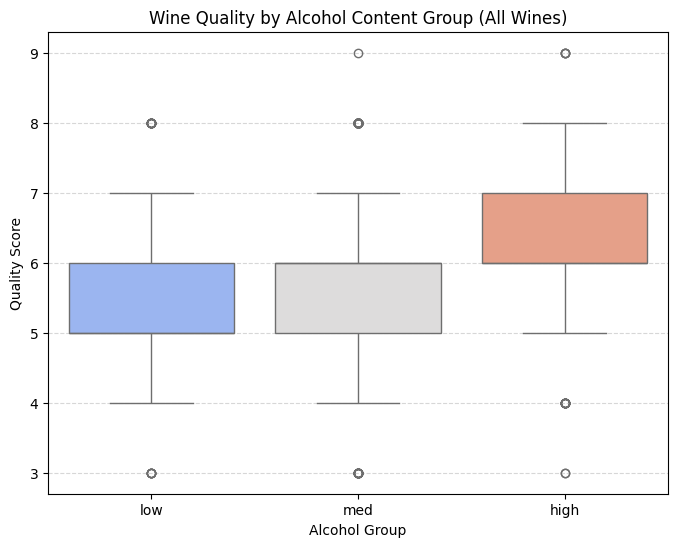

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x="alcohol_cat", y="quality", data=wine_all, hue="alcohol_cat", palette="coolwarm")
plt.title("Wine Quality by Alcohol Content Group (All Wines)")
plt.xlabel("Alcohol Group")
plt.ylabel("Quality Score")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

DESCRIPTION NEEDED

### Plotting the residual sugar variable and identify "sweet" and "dry" wines

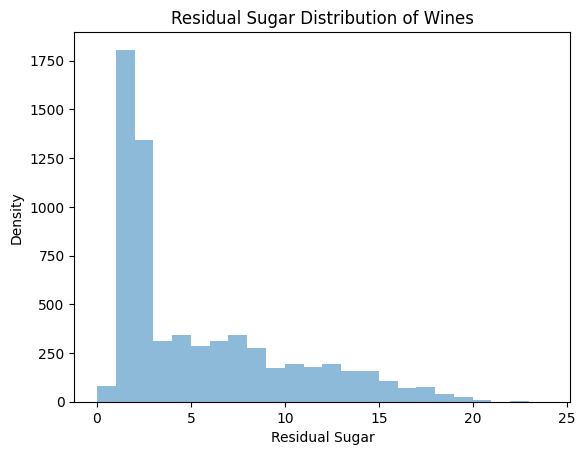

In [16]:
plt.hist(wine_all["residual sugar"], alpha=0.5, bins=range(0, 25))
plt.xlabel("Residual Sugar")
plt.ylabel("Count")
plt.title("Residual Sugar Distribution of Wines")
plt.show()

Defining this now into sweet and dry. (I first tried using a qcut approach but this is now done differently - maybe add to report)

In [19]:
threshold = wine_all["residual sugar"].median()
print("Threshold for 'isSweet':", threshold)
wine_all["isSweet"] = wine_all["residual sugar"] > threshold

Threshold for 'isSweet': 3.0


### Distribution Analysis of Quality vs isSweet

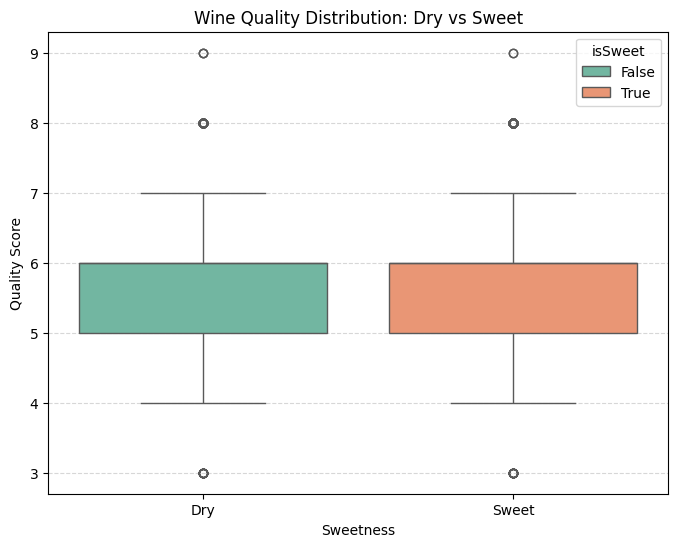

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x="isSweet", y="quality", data=wine_all, hue="isSweet", palette=["#66c2a5", "#fc8d62"])
plt.xticks([0, 1], ["Dry", "Sweet"])
plt.xlabel("Sweetness")
plt.ylabel("Quality Score")
plt.title("Wine Quality Distribution: Dry vs Sweet")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

DESCRIPTION NEEDED

## Determining which subset of variables is most useful for learning

For this part, I need to calculate the correlations between each pair the variables. I will do this by creating a Correlation Matrix. I will do this by using the `seaborn` package and displaying as a heatmap

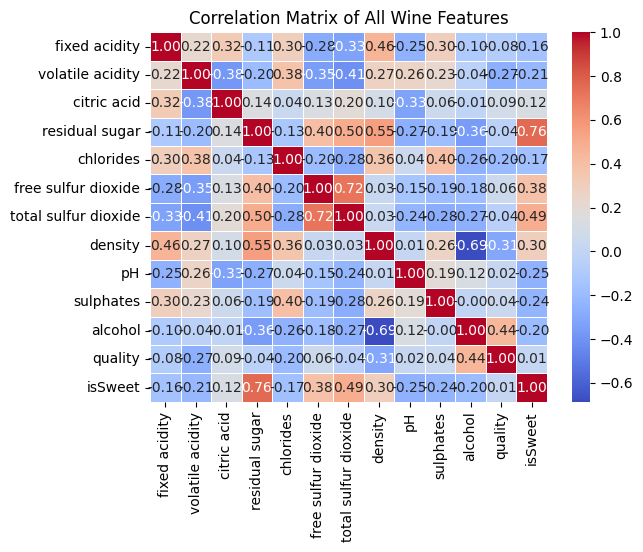

In [22]:
corr_matrix = wine_all.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Wine Features")
plt.show()

I have chosen to use the pearson ranking method as it makes sense that linear relationships seem reasonable for wine quality (do I need to explain why?)

COMMENT ON RELATIONSHIPS BETWEEN THEM

## Experiment with machine learning approaches

### Binary Classification

I am going to start by creating a binary classifier. As I believe this will be the easiest to implement as it simplifies the problem and can then move into Multi-Class classification.